In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
import os
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = "/content/drive/MyDrive/RCNN/imagee_data"
airplane_annotations = "/content/drive/MyDrive/RCNN/annotations"

42847.jpg


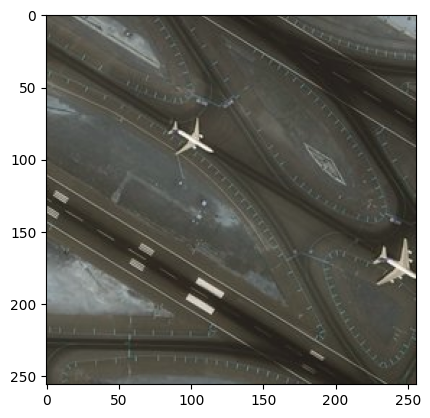

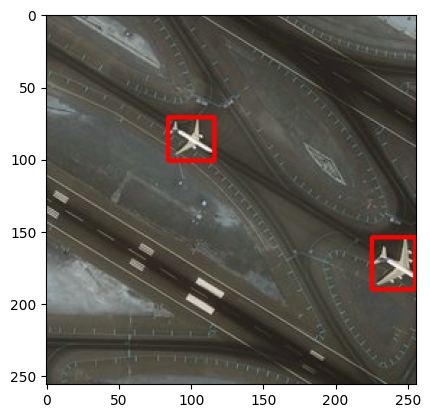

In [ ]:
for i, e in enumerate(os.listdir(airplane_annotations)):

  if i < 10:
    filename = e.split(".")[0]+ ".jpg"
    print(filename)
    img = cv2.imread(os.path.join(image_path, filename))
    df = pd.read_csv(os.path.join(airplane_annotations, e))
    plt.imshow(img)
    for row in df.iterrows():
      x1 = int(row[1][0].split(" ")[0])
      y1 = int(row[1][0].split(" ")[1])
      x2 = int(row[1][0].split(" ")[2])
      y2 = int(row[1][0].split(" ")[3])
      cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)

    plt.figure()
    plt.imshow(img)
    break

In [ ]:
cv2.setUseOptimized(True);
ss_object = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

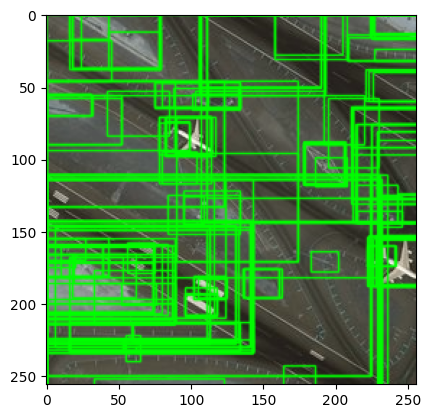

In [ ]:
input_image = cv2.imread(os.path.join(image_path, "42847.jpg"))
ss_object.setBaseImage(input_image)
ss_object.switchToSelectiveSearchFast()
rects = ss_object.process()
new_input_image = input_image.copy()
for i, rect in (enumerate(rects)):
  x,y,w,h = rect
  cv2.rectangle(new_input_image, (x,y), (x+w, y+h), (0,255,0), 1, cv2.LINE_AA)

plt.imshow(new_input_image)

In [ ]:
train_data = []
train_labels_data = []

In [ ]:
def calculate_iou(bb_1, bb_2):

  assert bb_1['x1'] < bb_1['x2']
  assert bb_1['y1'] < bb_1['y2']
  assert bb_2['x1'] < bb_2['x2']
  assert bb_2['y1'] < bb_2['y2']

  x_left = max(bb_1['x1'], bb_2['x1'])
  y_top = max(bb_1['y1'], bb_2['y1'])
  x_right = min(bb_1['x2'], bb_2['x2'])
  y_bottom = min(bb_1['y2'], bb_2['y2'])

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection = (x_right - x_left) * (y_bottom - y_top)

  bb_1_area = (bb_1['x2'] - bb_1['x1']) * (bb_1['y2'] - bb_1['y1'])
  bb_2_area = (bb_2['x2'] - bb_2['x1']) * (bb_2['y2'] - bb_2['y1'])

  iou_value = intersection / float(bb_1_area + bb_2_area - intersection)
  assert iou_value >= 0.0
  assert iou_value <= 1.0

  return iou_value

In [ ]:
max_region_proposals = 2000

In [ ]:
for i, e in enumerate(os.listdir(airplane_annotations)):

  try:
    if e.startswith("airplane"):
      filename = e.split(".")[0] + ".jpg"
      print(i, filename)
      image = cv2.imread(os.path.join(image_path, filename))
      df = pd.read_csv(os.path.join(airplane_annotations, e))
      coordinates = []

      for row in df.iterrows():
        x1 = int(row[1][0].split(" ")[0])
        y1 = int(row[1][0].split(" ")[1])
        x2 = int(row[1][0].split(" ")[2])
        y2 = int(row[1][0].split(" ")[3])
        coordinates.append({"x1": x1, "x2": x2, "y1": y1, "y2": y2})
      ss_object.setBaseImage(image)
      ss_object.switchToSelectiveSearchFast()
      ss_results = ss_object.process()
      image_new = image.copy()
      min_positive_samples = 0
      min_negative_samples = 0
      flag = 0
      foreground_flag = 0
      background_flag = 0

      for region, ss_coordinate in enumerate(ss_results):
        if region < max_region_proposals and flag ==0:
          for value in coordinates:
            x,y,w,h == ss_coordinate
            iou = calculate_iou(value, {"x1":x, "x2":x+w, "y1":y, "y2":y+h})
            if min_positive_samples < 30:
              if iou > 0.7:
                mobile_obj_img = image_new[y:y+h, x:x+w]
                resized_image = cv2.resize(mobile_obj_img, (224,224), interpolation = cv2.INTER_AREA)
                train_data.append(resized_image)
                train_labels_data.append(1)
                min_positive_samples += 1
            else:
              foreground_flag = 1
            if min_negative_samples < 30:
              if iou < 0.3:
                mobile_obj_img = image_new[y:y+h, x:x+w]
                resized_image = cv2.resize(mobile_obj_img, (224,224), interpolation = cv2.INTER_AREA)
                train_data.append(resized_image)
                train_labels_data.append(0)
                min_negative_samples += 1
            else:
              background_flag = 1
          if foreground_flag == 1 and background_flag == 1:
            print("inside")
            flag = 1
  except Exception as e:
    print(e)
    continue

15 airplane_003.jpg
17 airplane_011.jpg
18 airplane_009.jpg
19 airplane_007.jpg
20 airplane_001.jpg
22 airplane_014.jpg
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

23 airplane_013.jpg
24 airplane_006.jpg
25 airplane_017.jpg
26 airplane_019.jpg
27 airplane_022.jpg
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

28 airplane_016.jpg
29 airplane_021.jpg
30 airplane_020.jpg
31 airplane_026.jpg
32 airplane_023.jpg
33 airplane_025.jpg
34 airplane_024.jpg
35 airplane_035.jpg
36 airplane_034.jpg
37 airplane_032.jpg
38 airplane_033.jpg
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

39 airplane_036.jpg
40 airplane_029.jpg
41 airplane_027.jpg
42 airplane_046.jpg
43 airplane_039.jpg
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:

In [ ]:
X = np.array(train_data)
y = np.array(train_labels_data)

In [ ]:
X.shape

(14130, 224, 224, 3)

In [ ]:
y.shape

(14130,)

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.losses import CategoricalCrossentropy

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = True)
vgg_model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
for layers in (vgg_model.layers)[:15]:
  print(layers)
  layers.trainable = False

In [ ]:
x = vgg_model.layers[-2].output

In [ ]:
x = Dense(2, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg_model.input, outputs = x)

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate = 0.0001)

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class My_Label_Binarizer(LabelBinarizer):

  def transform(self, y):
    Y = super().transform(y)
    if self.y_type_ == 'binary':
      return np.hstack((Y, 1-Y))
    else:
      return Y

  def inverse_transform(self, Y, threshold = None):
    if self.y_type_ == 'binary':
      return super().inverse_transform(Y[:,0], threshold)
    else:
      return super().inverse_transform(Y, threshold)

In [ ]:
lb_object = My_Label_Binarizer()
Y = lb_object.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12717, 224, 224, 3) (1413, 224, 224, 3) (12717, 2) (1413, 2)


In [ ]:
"""trdata = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range = 90)
train_data = trdata.flow(x=x_train, y= y_train)
tsdata = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range = 90)
test_data = trdata.flow(x=x_test, y= y_test)"""


'trdata = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range = 90)\ntrain_data = trdata.flow(x=x_train, y= y_train)\ntsdata = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range = 90)\ntest_data = trdata.flow(x=x_test, y= y_test)'

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoints = ModelCheckpoint('ieeercnn_vgg16_1.h5', monitor='val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', save_freq = 'epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta = 0, patience = 100, verbose = 1,mode = 'auto')

In [ ]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test), validation_steps = 2, callbacks = [checkpoints, early])

Epoch 1/10
398/398 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9983
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ieeercnn_vgg16_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
